In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits import mplot3d

from spatial_pp import SPP_Thomas
from whittle_estimator import ThomasWhittleEstimator

# Profile Likelihoods
## Profile likelihood for $\rho$

Defaulting to taper leading to standard periodogram.


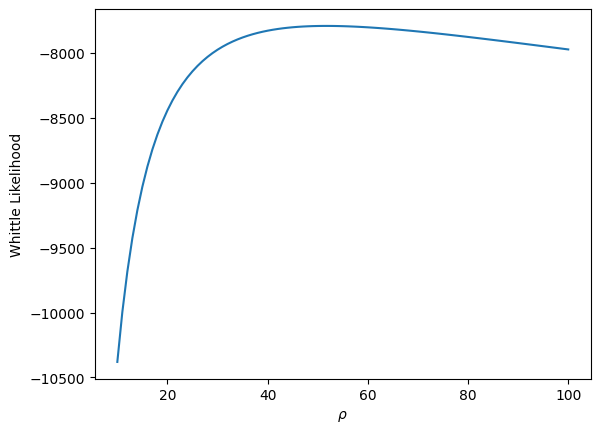

In [4]:
rho = 50
K = 10
sig = 0.03
cov = np.array([[1, 0], [0, 1]])

thom_spp = SPP_Thomas()
spp = thom_spp.simSPP(rho=rho, K=K, sigma=sig, cov=cov, enlarge=1.25)

twe = ThomasWhittleEstimator(spp, -16, 16, 1)

rho_set = np.arange(10, 100 + 1, 1)
likelihood = np.zeros(len(rho_set))

for i, rho_val in enumerate(rho_set):
    likelihood[i] = twe.computeLikelihood(rho=rho_val, K=K, sigma=sig)
    
plt.plot(rho_set, likelihood);
plt.xlabel(r"$\rho$");
plt.ylabel("Whittle Likelihood");

## Profile likelihood for $K$

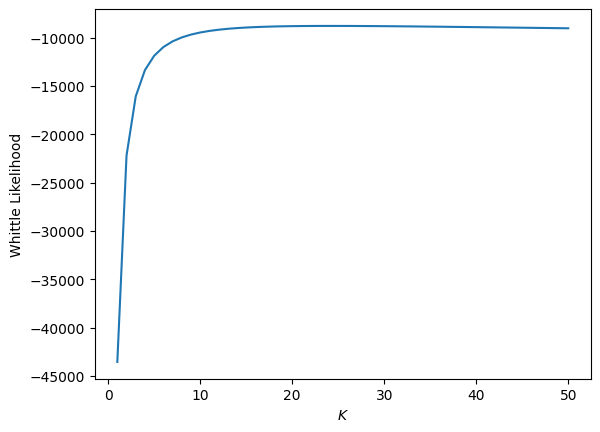

In [171]:
rho = 50
K = 25
sig = 0.03
cov = np.array([[1, 0], [0, 1]])

thom_spp = SPP_Thomas()
spp = thom_spp.simSPP(rho=rho, K=K, sigma=sig, cov=cov, enlarge=1.25)

twe = ThomasWhittleEstimator(spp, -16, 16, 1)

K_set = np.arange(1, 50 + 1, 1)
likelihood = np.zeros(len(K_set))

for i, K_val in enumerate(K_set):
    likelihood[i] = twe.computeLikelihood(rho, K_val, sig)
    
plt.plot(K_set, likelihood);
plt.xlabel(r"$K$");
plt.ylabel("Whittle Likelihood");

## Profile likelihood for $\sigma$

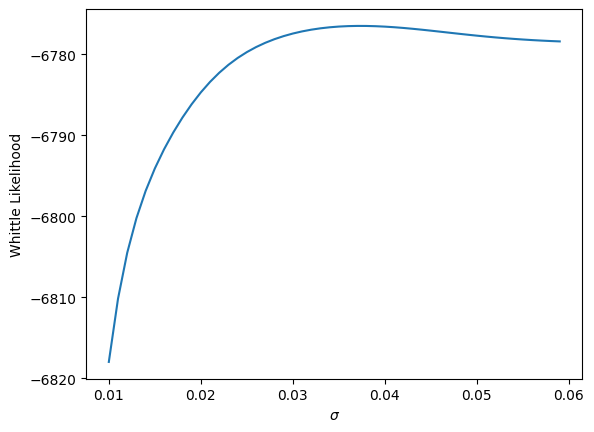

In [177]:
rho = 25
K = 10
sig = 0.03
cov = np.array([[1, 0], [0, 1]])

thom_spp = SPP_Thomas()
spp = thom_spp.simSPP(rho=rho, K=K, sigma=sig, cov=cov, enlarge=1.25)

twe = ThomasWhittleEstimator(spp, -16, 16, 1)

sig_set = np.arange(0.01, 0.05 + 0.01, 0.001)
likelihood = np.zeros(len(sig_set))

for i, sig_val in enumerate(sig_set):
    likelihood[i] = twe.computeLikelihood(rho, K, sig_val)
    
plt.plot(sig_set, likelihood);
plt.xlabel(r"$\sigma$");
plt.ylabel("Whittle Likelihood");

## Profile likelihood for $\rho$ and $K$

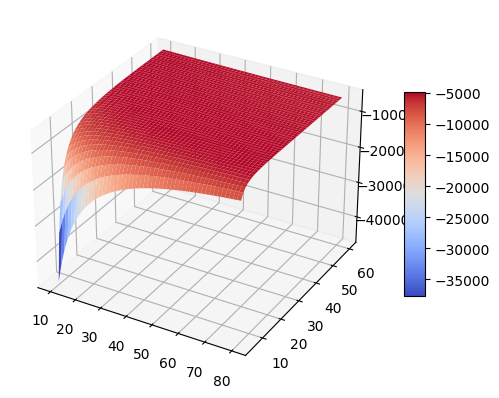

In [5]:
rho = 50
K = 25
sig = 0.01
cov = np.array([[1, 0], [0, 1]])

thom_spp = SPP_Thomas()
spp = thom_spp.simSPP(rho=rho, K=K, sigma=sig, cov=cov, enlarge=1.25)

twe = ThomasWhittleEstimator(spp, -10, 10, 1)

rho_set = np.linspace(10, 80, 50)
K_set = np.linspace(5, 60, 50)

likelihood = np.zeros((len(rho_set), len(K_set)))

x, y = np.zeros(len(rho_set) ** 2), np.zeros(len(K_set) ** 2)
k = 0
for i, K_val in enumerate(K_set):
    for j, rho_val in enumerate(rho_set):
        x[k], y[k] = rho_val, K_val
        likelihood[i, j] = twe.computeLikelihood(rho_val, K_val, sig)
        k += 1

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
RHO_SET, K_SET = np.meshgrid(rho_set, K_set)

# Plot the surface.
surf = ax.plot_surface(RHO_SET, K_SET, likelihood, cmap=cm.coolwarm)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.55, aspect=10)

plt.show()

## Profile likelihood for $\rho$ and $\sigma$

In [18]:
rho = 50
K = 10
sig = 0.03
cov = np.array([[1, 0], [0, 1]])

thom_spp = SPP_Thomas()
spp = thom_spp.simSPP(rho=rho, K=K, sigma=sig, cov=cov, enlarge=1.25)

N = len(spp)

twe = ThomasWhittleEstimator(spp, -10, 10, 1)

rho_set = np.linspace(10, 100, 50)
sig_set = np.linspace(0.01, 0.05, 50)

likelihood = np.zeros((len(rho_set), len(sig_set)))

x, y = np.zeros(len(rho_set) ** 2), np.zeros(len(sig_set) ** 2)
k = 0
for i, sig_val in enumerate(sig_set):
    for j, rho_val in enumerate(rho_set):
        x[k], y[k] = rho_val, sig_val
        likelihood[i, j] = twe.computeLikelihood(rho=rho_val, K=K, sigma=sig_val)
        k += 1

Defaulting to taper leading to standard periodogram.


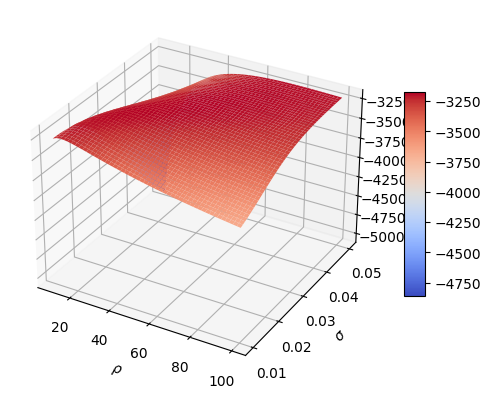

In [19]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
RHO_SET, SIG_SET = np.meshgrid(rho_set, sig_set)

# Plot the surface.
surf = ax.plot_surface(RHO_SET, SIG_SET, likelihood, cmap=cm.coolwarm)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.55, aspect=10)

# Set axis labels
ax.set_xlabel(r"$\rho$"); ax.set_ylabel(r"$\sigma$"); 

plt.savefig("Plots/Likelihood Surfaces/pseudo_rho_vs_sig_3var.pdf")

plt.show()

In [8]:
i,j = np.unravel_index(likelihood.argmax(), likelihood.shape)

In [20]:
max_idx = np.where(likelihood == likelihood.max())
rho_set[max_idx[1]]

array([39.3877551])

## Profile likelihood for $K$ and $\sigma$

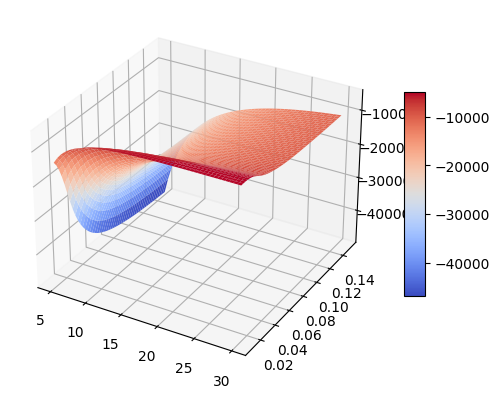

In [4]:
rho = 50
K = 25
sig = 0.01
cov = np.array([[1, 0], [0, 1]])

thom_spp = SPP_Thomas()
spp = thom_spp.simSPP(rho=rho, K=K, sigma=sig, cov=cov, enlarge=1.25)

twe = ThomasWhittleEstimator(spp, -10, 10, 1)

K_set = np.linspace(5, 30, 50)
sig_set = np.linspace(0.01, 0.15, 50)

likelihood = np.zeros((len(K_set), len(sig_set)))

x, y = np.zeros(len(K_set) ** 2), np.zeros(len(sig_set) ** 2)
k = 0
for i, sig_val in enumerate(sig_set):
    for j, K_val in enumerate(K_set):
        x[k], y[k] = K_val, sig_val
        likelihood[i, j] = twe.computeLikelihood(rho, K_val, sig_val)
        k += 1

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
K_SET, SIG_SET = np.meshgrid(K_set, sig_set)

# Plot the surface.
surf = ax.plot_surface(K_SET, SIG_SET, likelihood, cmap=cm.coolwarm)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.55, aspect=10)

plt.show()